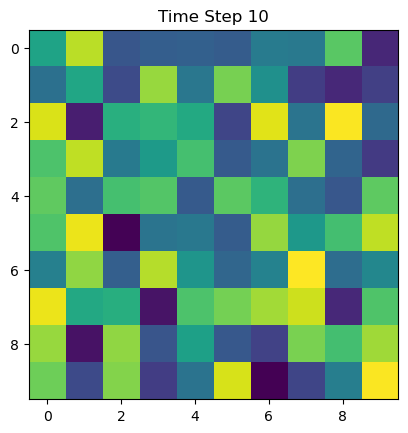

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Example data: a list of 10 2D numpy arrays (replace with your actual map data)
data = [np.random.rand(10, 10) for _ in range(10)]

fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    # Replace this with your map plotting code
    cax = ax.imshow(data[frame], cmap='viridis')
    ax.set_title(f"Time Step {frame + 1}")
    return cax,

ani = animation.FuncAnimation(fig, update, frames=len(data), blit=True, interval=500)

# Save the animation as a GIF
ani.save('map_animation.gif', writer='pillow')
plt.show()


In [ ]:
new_X = X.values[:, np.newaxis].astype('datetime64[D]').astype('int64')
new_X

In [ ]:
years = new_X.astype('datetime64[ns]')
years = years.astype('datetime64[D]')
years = years.astype('datetime64[ns]')
# decades = (years - 1940) / 10
years

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_X)
scaled_data
# scaled_data = (scaled_data - scaled_data[0]) + 1
# scaled_data

In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
import cartopy.io.img_tiles as cimgt

In [10]:
ds = xr.open_dataarray('ERA5_MIDWEST_2m_temperature_2019-2020_2025-04-15.nc')
ds.load()

<xarray.DataArray '2m_temperature' (time: 4416, lat: 53, lon: 95)> Size: 89MB
array([[[291.85828, 291.9959 , 292.07324, ..., 283.61975, 283.4142 ,
         283.30862],
        [291.64706, 291.81302, 291.8941 , ..., 284.31555, 284.26465,
         284.20807],
        [291.57352, 291.51697, 291.39816, ..., 285.00006, 285.16788,
         284.57013],
        ...,
        [296.29526, 297.79248, 298.99554, ..., 292.57483, 292.85956,
         293.39886],
        [296.399  , 297.76797, 298.62408, ..., 293.8816 , 293.8307 ,
         294.23044],
        [297.78116, 298.21112, 299.06155, ..., 294.66415, 294.60757,
         294.14746]],

       [[291.69232, 291.83188, 291.9205 , ..., 283.1125 , 282.99557,
         282.92206],
        [291.4717 , 291.62445, 291.70175, ..., 283.79135, 283.76306,
         283.748  ],
        [291.37366, 291.31143, 291.2115 , ..., 284.59842, 284.79453,
         283.76495],
...
        [296.33905, 296.4378 , 296.5886 , ..., 296.48987, 295.90997,
         296.2906 ],
        [296.48807, 296.57962, 296.5204 , ..., 297.19183, 297.3624 ,
         297.74658],
        [297.72504, 297.50064, 297.4324 , ..., 298.28162, 298.45755,
         298.5114 ]],

       [[293.4037 , 293.36957, 293.2708 , ..., 289.85248, 289.43597,
         289.15588],
        [293.95663, 294.00513, 293.92252, ..., 290.02304, 289.7017 ,
         289.44315],
        [294.48807, 294.34802, 294.05896, ..., 290.24567, 290.1523 ,
         289.8848 ],
        ...,
        [295.99075, 296.3947 , 296.75198, ..., 296.45395, 295.7053 ,
         295.822  ],
        [296.2044 , 296.58322, 296.73224, ..., 297.02127, 296.94766,
         297.0572 ],
        [297.36957, 297.42343, 297.56348, ..., 298.04822, 297.9764 ,
         297.57245]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 35kB 2019-06-01 ... 2020-08-31T23:00:00
  * lon      (lon) float32 380B 256.2 256.5 256.8 257.0 ... 279.2 279.5 279.8
  * lat      (lat) float32 212B 49.25 49.0 48.75 48.5 ... 37.0 36.75 36.5 36.25
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K

In [16]:
ds.sel(time='2019-07-01')

<xarray.DataArray '2m_temperature' (time: 24, lat: 29, lon: 27)> Size: 75kB
array([[[300.3895 , 299.56842, 298.34857, ..., 287.82498, 292.14062,
         297.92624],
        [300.7212 , 299.47778, 298.21808, ..., 288.88895, 291.49536,
         296.78073],
        [300.54718, 299.31827, 298.14014, ..., 290.98242, 292.427  ,
         296.20615],
        ...,
        [302.78748, 302.58084, 302.37784, ..., 305.36127, 304.97702,
         304.4115 ],
        [302.39053, 302.44128, 302.31982, ..., 304.8429 , 304.46408,
         303.98737],
        [301.56946, 301.61658, 301.81778, ..., 304.17767, 303.788  ,
         303.14273]],

       [[299.8566 , 299.12253, 298.15826, ..., 287.83224, 290.9353 ,
         296.75354],
        [300.1466 , 299.17508, 298.151  , ..., 288.7838 , 290.1867 ,
         295.3307 ],
        [299.93454, 298.91953, 297.92807, ..., 289.86407, 290.83017,
         293.90967],
...
        [303.08112, 302.91074, 301.6764 , ..., 305.8452 , 305.80896,
         305.82166],
        [302.8799 , 302.4594 , 301.34833, ..., 305.76547, 305.79266,
         305.89233],
        [301.25226, 300.86255, 302.01895, ..., 304.9027 , 304.93713,
         305.4519 ]],

       [[302.08966, 301.7942 , 301.70358, ..., 287.4661 , 292.11163,
         298.68933],
        [302.55365, 302.35608, 302.2709 , ..., 288.13675, 289.85864,
         295.55545],
        [302.97418, 302.87085, 302.68234, ..., 288.579  , 289.86227,
         293.30792],
        ...,
        [300.55444, 300.2771 , 300.12485, ..., 306.1026 , 305.99203,
         305.96124],
        [300.1611 , 299.86566, 299.69708, ..., 305.8597 , 305.86697,
         305.8851 ],
        [300.0197 , 299.71704, 299.8403 , ..., 304.88275, 304.89908,
         305.2761 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 192B 2019-07-01 ... 2019-07-01T23:00:00
  * lat      (lat) float32 116B 43.25 43.0 42.75 42.5 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 108B 267.2 267.5 267.8 268.0 ... 273.2 273.5 273.8
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K

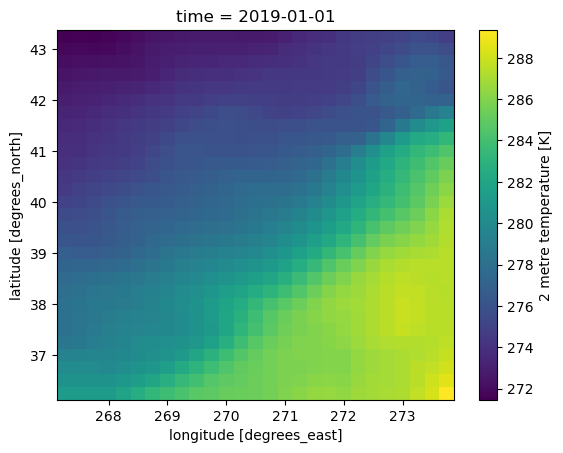

In [5]:
ds.isel(time=0).plot()

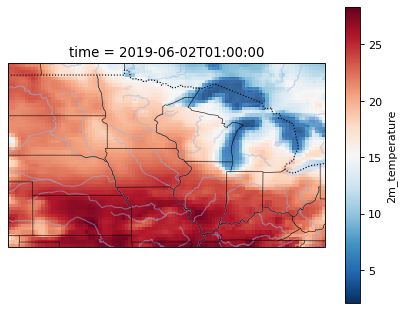

In [8]:
def create_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(dpi=80, subplot_kw=dict(projection=projection))
    ax.add_feature(cfeature.LAKES, alpha=0.25)  # Add lakes
    ax.add_feature(cfeature.RIVERS, alpha=0.5)   # Add rivers
    ax.add_feature(cfeature.BORDERS, linestyle=":")  # Add borders
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',  
        name='admin_1_states_provinces_lines',
        scale='50m', 
        linewidth=0.5, 
        facecolor='none'
    )
    ax.add_feature(states_provinces, edgecolor='black', zorder=10)
    return fig, ax

result = ds.isel(time=25)
result= result - 273.15
# Plot for result.slope
fig1, ax1 = create_map()
result.plot(ax=ax1, cmap="RdBu_r")
plt.show()

In [3]:
# import fsspec

# fs = fsspec.filesystem('gs')
# fs.ls('gs://gcp-public-data-arco-era5/co/')

reanalysis = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3', 
    chunks={'time': 48},
    consolidated=True,
    )
print('Done')

Done


In [11]:
mask = (
    (reanalysis.time.dt.month >= 6) &
    (reanalysis.time.dt.month <= 8) &
    (reanalysis.time.dt.year >= 2019) &
    (reanalysis.time.dt.year <= 2020)
)

import dask

with dask.config.set({'array.slicing.split_large_chunks': True}):
    summer_data = reanalysis.where(mask, drop=True)


era5_var = summer_data['2m_temperature']

In [12]:
era5_var

<xarray.DataArray '2m_temperature' (time: 4416, latitude: 721, longitude: 1440)> Size: 18GB
dask.array<where, shape=(4416, 721, 1440), dtype=float32, chunksize=(24, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 35kB 2019-06-01 ... 2020-08-31T23:00:00
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K

In [7]:
era5_var

<xarray.DataArray '2m_temperature' (time: 24288, latitude: 721, longitude: 1440)> Size: 101GB
dask.array<where, shape=(24288, 721, 1440), dtype=float32, chunksize=(48, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 194kB 2010-06-01 ... 2020-08-31T23:00:00
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K

In [5]:
year_start = 2010
year_end = 2020

i_date = str(year_start) + '-01-01'
f_date = str(year_end)   + '-12-31'

recent_an = reanalysis.sel(time=slice(i_date, f_date))

era5_var = recent_an['2m_temperature']

era5_var

<xarray.DataArray '2m_temperature' (time: 96432, latitude: 721, longitude: 1440)> Size: 400GB
dask.array<getitem, shape=(96432, 721, 1440), dtype=float32, chunksize=(48, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 771kB 2010-01-01 ... 2020-12-31T23:00:00
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K

In [ ]:
# 2010-2020: 96432

In [10]:
tmp = [25, 28]
dpt = [22, 23]

In [23]:
from metpy.calc import relative_humidity_from_dewpoint
from metpy.units import units
i = relative_humidity_from_dewpoint(tmp * units.degC, dpt * units.degC)

In [24]:
i = i.magnitude * 100

In [25]:
i[0]

83.43764448933862

In [32]:
x = 25

outside_var = 1

def Test_Function(x, **kwargs):
    k_var = kwargs.get('k_var', 0) 
    y     = kwargs.get('y',     0)
    new = outside_var + k_var + x + y
    # it should output (1 + 2.5 + 25 + 1)
    return new
print(Test_Function(x, k_var=2.5, y=1))

28.5


In [3]:
import xarray as xr

In [5]:
ds = xr.open_dataarray('/data/cristi/a/kchoo3/ERA5_IL_2m_temperature_2019-2019_2025-04-22.nc')
ds.load()

<xarray.DataArray '2m_temperature' (time: 2208, lat: 55, lon: 95)> Size: 46MB
array([[[291.78473, 291.66592, 291.434  , ..., 282.24133, 282.09235,
         281.96225],
        [291.96576, 291.86203, 291.92426, ..., 282.89377, 282.6769 ,
         282.54492],
        [291.85828, 291.9959 , 292.07324, ..., 283.61975, 283.4142 ,
         283.30862],
        ...,
        [296.29526, 297.79248, 298.99554, ..., 292.57483, 292.85956,
         293.39886],
        [296.399  , 297.76797, 298.62408, ..., 293.8816 , 293.8307 ,
         294.23044],
        [297.78116, 298.21112, 299.06155, ..., 294.66415, 294.60757,
         294.14746]],

       [[291.7225 , 291.5641 , 291.32086, ..., 282.0886 , 281.97922,
         281.84344],
        [291.85638, 291.69986, 291.7715 , ..., 282.60147, 282.4525 ,
         282.31485],
        [291.69232, 291.83188, 291.9205 , ..., 283.1125 , 282.99557,
         282.92206],
...
        [299.76437, 301.07632, 301.96884, ..., 300.04782, 299.88312,
         301.02655],
        [298.65735, 299.8927 , 300.84842, ..., 301.4479 , 302.2504 ,
         303.38806],
        [299.8467 , 300.3562 , 301.31   , ..., 302.97437, 303.77304,
         303.79602]],

       [[296.64246, 296.29196, 295.82272, ..., 286.97604, 286.67917,
         286.5202 ],
        [297.11743, 296.76312, 296.4356 , ..., 287.24802, 286.93008,
         286.7692 ],
        [297.2975 , 297.10403, 296.77844, ..., 287.474  , 287.15607,
         286.92816],
        ...,
        [299.82565, 300.96524, 301.72943, ..., 299.63412, 299.65137,
         300.6358 ],
        [299.2281 , 300.32553, 301.10123, ..., 300.88287, 301.5877 ,
         302.58365],
        [300.3696 , 300.98248, 301.75433, ..., 302.24658, 302.94373,
         302.75604]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 18kB 2019-06-01 ... 2019-08-31T23:00:00
  * lon      (lon) float32 380B 256.2 256.5 256.8 257.0 ... 279.2 279.5 279.8
  * lat      (lat) float32 220B 49.75 49.5 49.25 49.0 ... 37.0 36.75 36.5 36.25
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K